**Centro de investigación en Matemáticas A.C**

**Temas Selectos en Estadística**

**Hairo Ulises Miranda Belmonte**

**Tarea 2.  Distribución de Wishart y Marcenko-Pastur**

**23 de Agosto del 2019**

# Distribución de Wishart y Marcenko-Pastur

## Ejercicio 1 

* ¿Como lucen los eigenvalores de una matriz de covarianza gaussiana?

Realice el siguiente experimiento (Izenman, 2da edició):

* Genere una matriz Z de dimensión $p × n$ cuyas entradas sean iid $N(0, 1)$

* Sea D una matriz diagonal $p × p$, y $X = DZ$

* Sea S = $n^{−1}XX'$ la matriz de covarianza muestral de dimensión $p × p$ De esta manera $XX' ∼ Wp(n, D2)$

* Simule y grafique en orden descendente los eigenvalores de la matriz S
para los casos $p = 30$, $n ∈ {30, 300}$, y $D^2 = diag(12, 11, 10, 9, 8, 7, 3, 3, 3, . . . , 3)$

* ¿Cuantos componentes principales retendría en cada caso?

Simulación 

In [374]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

p = 30
n = [30, 300]
Matriz = []
for i in n :
    Z = np.random.normal(0, 1, (p,i))
    a1 = np.array([12,11,10,9,8,7])
    a2 = np.repeat(3, p-6)
    D2 = np.diag(np.concatenate((a1,a2)))
    D = np.sqrt(np.diag(np.concatenate((a1,a2))))
    X = np.dot(D,Z)
    S = np.dot(X, X.T)/ i
    v, w = np.linalg.eigh(S)
    temp = np.sort(v)[::-1]
    Matriz.append(temp)

Visualización

De la simulación de las matrices gaussianas, se estima la matriz de covarinza de cada una de ellas y se calculan sus valores y vectores propios.

Se ordenan los valores propios de orden decendente y se gráfica sus respectivos *scrrplot* (i.e., para $n=30, 300$)

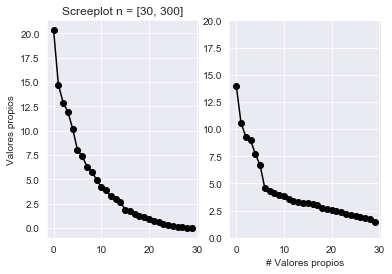

In [375]:
plt.subplot(1, 2, 1)
plt.plot(Matriz[0],  'o', c="black")
plt.plot(Matriz[0],  '-', c="black")
plt.title('Screeplot n = [30, 300]')
plt.ylabel('Valores propios')

plt.subplot(1, 2, 2)
plt.plot(Matriz[1],  'o', c="black")
plt.plot(Matriz[1],  '-', c="black")
plt.ylim((0,20))
plt.xlabel('# Valores propios')


plt.show()

En el gráfico de la izquierda se observan los valores propios cuando se tiene $n=30$, en el de la derecha cuando $n=300$. Siguiendo el críterio del "codo", podemos conservar entre 8 a 10 componentes.

In [376]:
import pandas as pd

var_exp = [Matriz[0][:i+1].sum()/(Matriz[0].sum()) for i in range(10)]
valor_prop = list(range(10))

pd.DataFrame({'Varianza explicada': var_exp}, 
             index = ['1','2','3','4','5','6','7','8','9','10'])

             


,Varianza explicada
1,0.155952
2,0.268847
3,0.367749
4,0.459194
5,0.537375
6,0.598864
7,0.655510
8,0.703923
9,0.748362
10,0.786429


Con base a tomar el número de las componentes que expliquen el $80\%$ se concluye que 10 son suficientes.

## Ejercicio 2

* Distribución de los valores propios de la matriz aleatoria $XX'\sim W_p(n, I_p)$

* Gráfique la distribución de valores propios por medio de Monte Carlo, considerando el caso en que $n>p$

Simulación

In [377]:
final = []
p = 30
n = [30, 300]

for j in n:
    valores_p = []
    for i in range(1000):
        X = np.random.normal(0, 1, (p,j))
        temp2 = np.dot(X,X.T)/ j
        v, w = np.linalg.eigh(temp2)
        valores_p.append(v.tolist())
    flattened = [val for sublist in valores_p for val in sublist]
    final.append(flattened)


Visualización

Se realizan mil simulaciones de una matriz aleatoria cuya distribución es normal con $\mu = 1$ y $\sigma^2 = 0$. Se estima a cada una su matriz de covarianza y se calculan sus respectivos valores propios. Al tener todos los valores propios para todas las simulaciones se gráfica el histograma para aproximar la función de densidad de los valores propios de la matrix aleatoria cuya distribución es la Wishart.

Lo anterior se hace para el varios tamaños de la matriz, la primera para $n=10$; la segunda, para $n =300$

Función de distribución a simular con Monte Carlo

$$\rho(\lambda_1,...,\lambda_1)=\frac{1}{Z_p}e^{\frac{-\Sigma_{p}^{i=1}\lambda_i}{2}}\Pi_{i=1}^{p}\lambda_i^{\alpha/2}\Pi_{j<k}|\lambda_j-\lambda_k|$$

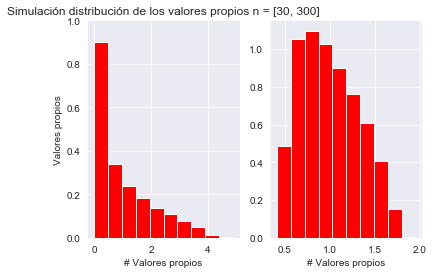

In [378]:
plt.subplot(1, 2, 1)
plt.hist(final[0], density=True, color="r") 
plt.title('Simulación distribución de los valores propios n = [30, 300]')
plt.ylim((0,1))
plt.ylabel('Valores propios')
plt.xlabel('# Valores propios')

plt.subplot(1, 2, 2)
plt.hist(final[1], density=True, color="r")
plt.xlabel('# Valores propios')


plt.show()

Se puede observar que conforme incrementa el tamaño de $n$ la distribución de los valores propios de la matriz aleatoria comienza a centrarse, observando colas con mayor peso

## Ejercicio 3

* Distribución límite de valores propios


$$\rho(\lambda))\frac{\sqrt((\lambda_{max}-\lambda)(\lambda-\lambda_{min}))}{2\pi c\lambda}$$

$$\lambda_{min}^{max}=(1 \pm \sqrt(c)^2$$

Simulación

Se realiza la simulación de la distribución límite de los valores propios, con los parámetros $p=30$ y $n = 30, 300$. Cabe mencionar que cuando realicemos $n=30$, por el resultado $\frac{p}{n}$ tiende a $c$, el cociente será de valor uno, y por ende al determinar el mínimo de la cota de los valores propios, el resultado será de cero. 

In [379]:
p = 30
n = [30,300]   

Valores =  np.empty((2, len(lam)))

for j in range(2):
    c = p/n[j]
    maximo = (1 + np.sqrt(c))**2
    minimo = (1 - np.sqrt(c))**2
    lam = np.linspace(minimo,maximo , 10)
    Valores[j,:] =  np.sqrt((maximo - lam)*(lam - minimo))/ (2*c*np.pi*lam) 


C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Visualización

Como se mencioní, la distribución simulada y la límite cuando n es pequeño, la densidad espectral de los valores propios de la matriz de Wishart (i.e., $W=n^{-1}XX'$) no converge (casi seguro) a la ley de Marcenko-Pastur. Por otro lado, si incrementamos el valor de $n$ pero el valor de $p$ permanece constante, se observa que la densidad espectral de los valores propios de la matriz Wishart tiende a converger (casi seguro) a la ley de Marcenko-Pastur.

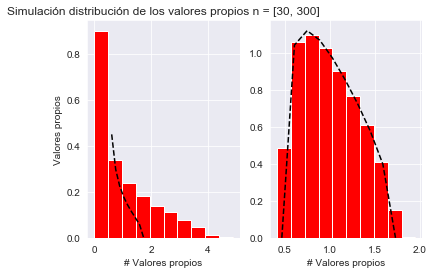

In [380]:
plt.subplot(1, 2, 1)
plt.hist(final[0], density=True, color="r") 
plt.plot(lam, Valores[0].flatten(), '--', c="black")
plt.title('Simulación distribución de los valores propios n = [30, 300]')
plt.ylabel('Valores propios')
plt.xlabel('# Valores propios')

plt.subplot(1, 2, 2)
plt.hist(final[1], density=True, color="r") 
plt.plot(lam, Valores[1].flatten(), '--', c="black")
plt.xlabel('# Valores propios')


plt.show()

No obstante, el resultado mejoraría si incrementamos el valor de $p$.

¿Cómo nos ayuda esto para determinar el número de componentes en PCA?

Cómo se mencionó en clase, se pretende modelar el ruido que se genera por la naturaleza de la matriz aleatoria y de la finitud de la muestra, esto con el fin de obtener una cota que  indique cuales valore propios son aquellos que aportan más.

Se utilizan los valores propios que se obtuvieron para el ejercicio 1 con $n=300$, y se trazan los primeros ocho valores propios. Como resultado se observan que caen fuera de la distribución límite y simulada, siendo aquellos que aportan más.

Nota: por cuestiones de visualización se toman solo ocho, que efectivamente son los que se encuentran más separados de la cota máxima de la distribución; sin embargo; a su vez, los valores porpios que se gráfican como linea vertical son los primeros ochos más grandes (ordenados de forma decendiente).

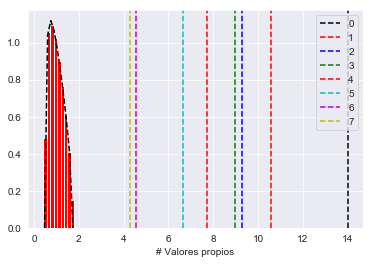

In [383]:
colors = ['k', 'r', 'b', 'g','r','c','m','y']

plt.hist(final[1], density=True, color="r") 
for i, c in zip(range(8),colors):
    plt.axvline(x=temp[i], c=c, linestyle='--', label=i)
plt.plot(lam, Valores[1].flatten(), '--', c="black")
plt.xlabel('# Valores propios')
plt.legend()

En conclusión se toman 8 valores propios, los cuales se apriximan al número de valores que se eligen mediante el *screeplot*

## Ejercicio 4

* Caso multivariado

* Considera la matriz estandarizada Z, compuesta por $p$ series de tiempo de longitud $n$.

* La matriz de correlación se define como $C = \frac{1}{n}ZZ'$

* Grafica el mapa de calor para los casos $p = 40$, $n = 10, 1000$

* Calcule la media y desviación estandar de los elementos diagonales y no diagonales por separado.

* ¿ Qué diferencias encuentra en cada caso?

Se tiene que el valor finito de "n" produce un *noise dressing* del coeficiente de correlación.

De está forma con el heamap se espera que la estructura de correlación tienda a cero conforme "n" incrementa.


In [384]:
from numpy import *

p = 40 
n = [10,1000] 
C = []
for i in n:
    Z = np.random.normal(0, 1, (p,i))
    C.append(np.dot(Z,Z.T)/i)



Text(0.5, 1.0, 'n = 1000')

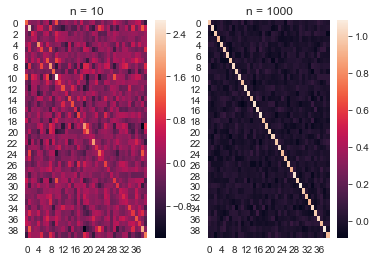

In [385]:
# No normalizada
plt.subplot(1, 2, 1)
sns.heatmap(C[0]) # no normalizada
plt.title('n = 10')
plt.subplot(1, 2, 2)
sns.heatmap(C[1]) # no  normalizada
plt.title('n = 1000')


En la figura de la izquierda se observa el heatmap de la matriz de correlación cuando el valor de $n = 10$, donde el color rojo indica una correlación positiva, se puede ver que elementos fuera de la diagonal presentanestructura de correlación entre las series de tiempo, debido a la finitud de n. No obstante; al aplicar TLC, conforme n tiende a infinito ($n=100$), el problema de ruido tiende a desaparecer, mostrando que los elementos fuera de la diagonal (la correlación entre series) tiende a cero.

En términos matemáticos lo que sucede es lo siguiente:

$C_{1,2}$ viene de distribución con $\mu=0$ y $\sigma=1/\sqrt(n)$, y conforme $n \rightarrow \infty$, $C_{1,2} \rightarrow 0$

* Media y desviación estándar de los elementos de la diagonal

In [386]:
print("La media de los elementos diagonales con n =10 ->", np.diag(C[0]).mean())
print("La sd de los elementos diagonales con n =10 ->", np.sqrt(np.diag(C[0]).var()))

print("\nLa media de los elementos diagonales con n =1000 ->", np.diag(C[1]).mean())
print("La sd de los elementos diagonales con n =1000:", np.sqrt(np.diag(C[1]).var()))

La media de los elementos diagonales con n =10 -> 1.0809458403258847
La sd de los elementos diagonales con n =10 -> 0.5537864809053984

La media de los elementos diagonales con n =1000 -> 0.9992729016953212
La sd de los elementos diagonales con n =1000: 0.043193128725715145


Se observa el el valor medio cuando "n" incrementa sigue fluctuando sobre el valor de uno, sin embargo, las varianza tiende a disminuir en proporción de uno sobre "n"

* Media y desviación estándar de los elemenntos no diagonales

In [387]:
index = ~np.eye(C[0].shape[0],dtype=bool)

print("La media de los elementos no diagonales con n =10 ->",C[0][index].mean())
print("La sd de los elementos no diagonales con n =10 ->", np.sqrt(C[0][index].var()))

print("\nLa media de los elementos no diagonales con n =1000 ->", C[1][index].mean())
print("La sd de los elementos no diagonales con n =1000:", np.sqrt(C[1][index].var()))

La media de los elementos no diagonales con n =10 -> 0.0014898984260084379
La sd de los elementos no diagonales con n =10 -> 0.3417992248136044

La media de los elementos no diagonales con n =1000 -> -0.00023667763067627878
La sd de los elementos no diagonales con n =1000: 0.03212958622916172


En el caso de los elementos fuera de la diagonal la media tiende a incrementar conforme "n" aumenta, y la desviación estándar reduce al mismo factor que los elementos de la diagonal